# Instalação das Bibliotecas Necessárias

Execute o comando abaixo para instalar a biblioteca Qiskit e todos os pacotes necessários.

```python
!pip install qiskit qiskit_aer qiskit_ibm_provider qiskit_ibm_runtime


In [ ]:
# !pip install qiskit qiskit_aer qiskit_ibm_provider qiskit_ibm_runtime

# Configuração da Conta IBM Quantum

Para ter acesso aos computadores quânticos da IBM, faça o seguinte:

Primeiro, crie uma conta IBM Quantum no site: [https://quantum.ibm.com/](https://quantum.ibm.com/).

Com a conta criada, faça login e acesse: [https://quantum.ibm.com/account](https://quantum.ibm.com/account).

Nesta página, você poderá copiar o seu Token de API, necessário para rodar circuitos em computadores quânticos reais da IBM.

In [39]:
# Importar os componentes necessários para simular ruído em computadores quânticos
from qiskit_aer.noise import (
    NoiseModel,
    QuantumError,
    ReadoutError,
    depolarizing_error,
    pauli_error,
    thermal_relaxation_error,
)

In [69]:
# Importar componentes para criar e transpilar circuitos quânticos
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, transpile
# Importar o simulador ideal de computadores quânticos
from qiskit_aer import Aer, AerSimulator
# Importar funções para visualizar coeficientes de estados quânticos e desenhar circuitos
from qiskit.visualization import circuit_drawer, plot_histogram, array_to_latex
from qiskit.quantum_info import Statevector
# Logar e rodar serviços da IBM Quantum
from qiskit_ibm_provider import IBMProvider
from qiskit_ibm_runtime import QiskitRuntimeService

# Token da sua conta IBM Quantum e login os serviços da IBM
api_token = "COLOQUE AQUI SEU TOKEN DE API DE SUA CONTA IBM QUANTUM"
IBMProvider.save_account(api_token, overwrite=True)
IBMProvider.saved_accounts()
provider = IBMProvider()

# Criar e visualizar circuitos quânticos

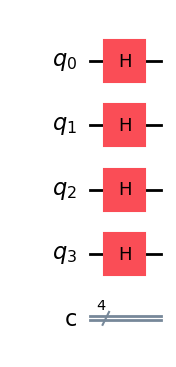

In [41]:
# Cria um estados quântico de 4 qubits em superposição equilibrida
qc = QuantumCircuit(4,4) # Criar registradores quânticos (de 4 qubits) e clássicos (de 4 bits)
qc.h(0)
qc.h(1)
qc.h(2)
qc.h(3)
qc.draw("mpl", style="iqp") # Desenha o circuito
# OBS.: Não coloque portas de medida/observação agora

In [42]:
# Calcula o coeficinte de cada estado
state = Statevector.from_int(0, 2**4) # Temos 4 qubits
state = state.evolve(qc)
state.draw('latex')

<IPython.core.display.Latex object>

In [43]:
array_to_latex(state) # Representação na forma de vetor linha

<IPython.core.display.Latex object>

# Vamos simular o circuito qc abaixo

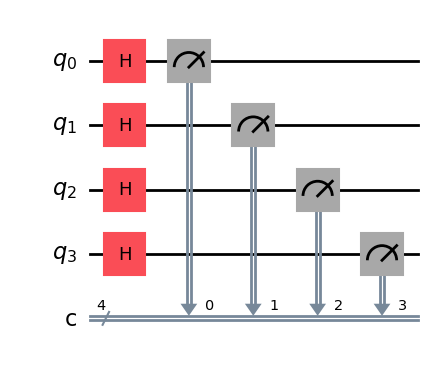

In [44]:
qc = QuantumCircuit(4, 4)
qc.h(0)
qc.h(1)
qc.h(2)
qc.h(3)
qc.measure(0,0) # Vamos colocar portas de medida/observação
qc.measure(1,1)
qc.measure(2,2)
qc.measure(3,3)
qc.draw("mpl", style="iqp")

In [45]:
backend = Aer.get_backend('qasm_simulator') # Vamos usar o simulador QASM como backend

# Vamos simular o circuito 1024 vezes, usando uma seed, em nosso backend
job_simulador = backend.run(qc, shots=2048, seed_simulator=42)
resultado = job_simulador.result() # Obtem os resultados
contagem_simulador = resultado.get_counts() # Obtem a contagem de cada estado obtido
contagem_simulador

{'0110': 147,
 '1010': 127,
 '0001': 139,
 '0000': 108,
 '1100': 103,
 '0011': 125,
 '1101': 130,
 '0100': 140,
 '1111': 138,
 '0101': 128,
 '0010': 133,
 '0111': 128,
 '1110': 119,
 '1001': 129,
 '1000': 117,
 '1011': 137}

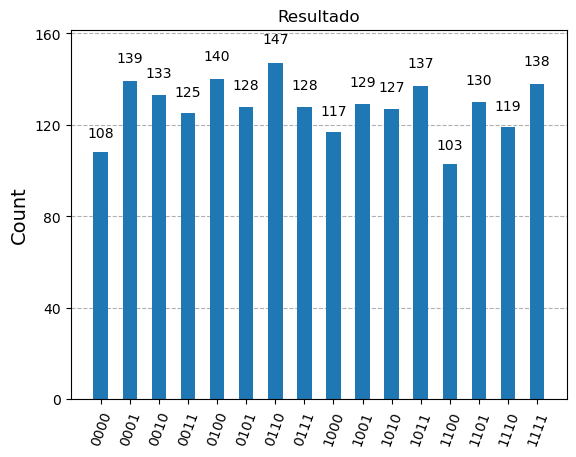

In [46]:
plot_histogram(contagem_simulador, title="Resultado") # Plot do resultado

# Vamos rodar o circuito qc abaixo em um hardware quântico real

In [47]:
provider = IBMProvider()
# Mostra os backend disponiveis que estejam operacionais e não sejam simuladores.
quantum_devices_available = provider.backends(simulator=False, operational=True)
quantum_devices_available 

[<IBMBackend('ibm_brisbane')>,
 <IBMBackend('ibm_kyoto')>,
 <IBMBackend('ibm_osaka')>,
 <IBMBackend('ibm_sherbrooke')>]

In [48]:
# Vamos pegar o primeiro backend e ver algumas de suas caracteristicas
backend = quantum_devices_available[2]
print(backend)
print(backend.name)
print(backend.num_qubits)

<IBMBackend('ibm_osaka')>
ibm_osaka
127


In [49]:
backend.status() # Status do hardware

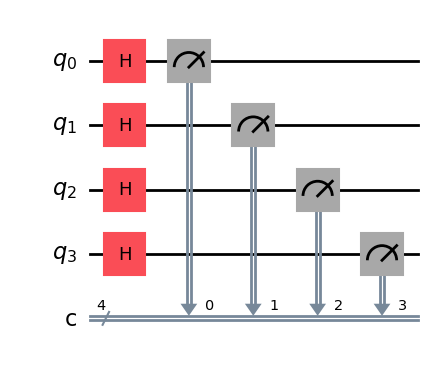

In [50]:
# Vamos definir o circuito novamente
qc = QuantumCircuit(4, 4)
qc.h(0)
qc.h(1)
qc.h(2)
qc.h(3)
qc.measure(0,0) # Vamos colocar portas de medida/observação
qc.measure(1,1)
qc.measure(2,2)
qc.measure(3,3)
qc.draw("mpl", style="iqp")

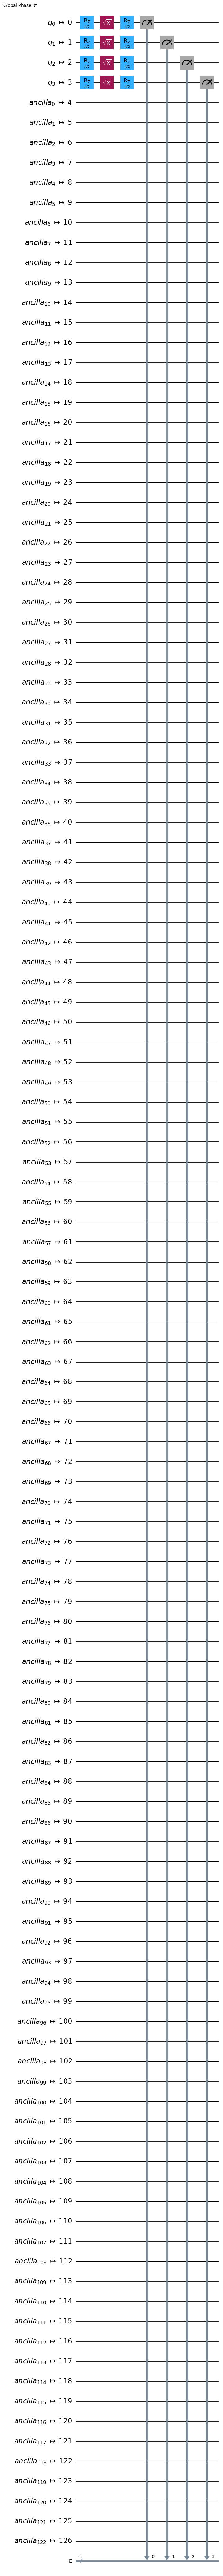

In [51]:
# Vamos criar um circuito transpilado com base nas portas disponiveis neste backend
mapped_circuit = transpile(qc, backend=backend)
mapped_circuit.draw("mpl", style="iqp")

In [52]:
# Roda o circuito transpilado 2048 vezes no backend selecionado
job = backend.run(mapped_circuit, shots=2048, job_tags=["exemplo: 4 Hadamard"])

In [54]:
# Vê o status do job
job.status()

<JobStatus.DONE: 'job has successfully run'>

In [55]:
# Obtem o id do job
id_job_atual = job.job_id()
id_job_atual

'cs8d408kh0e0008vtsc0'

In [56]:
# Recupera o job a partir do id
retrieved_job = provider.backend.retrieve_job(id_job_atual)
retrieved_job

<IBMCircuitJob('cs8d408kh0e0008vtsc0')>

In [57]:
# Obtem a contagem do resultado do job
contagem_hardware = retrieved_job.result().get_counts()
contagem_hardware

{'1101': 119,
 '1111': 118,
 '1100': 135,
 '1010': 119,
 '0111': 136,
 '1000': 137,
 '0001': 114,
 '1011': 128,
 '0100': 128,
 '1001': 140,
 '0110': 125,
 '0011': 111,
 '0010': 129,
 '1110': 135,
 '0000': 139,
 '0101': 135}

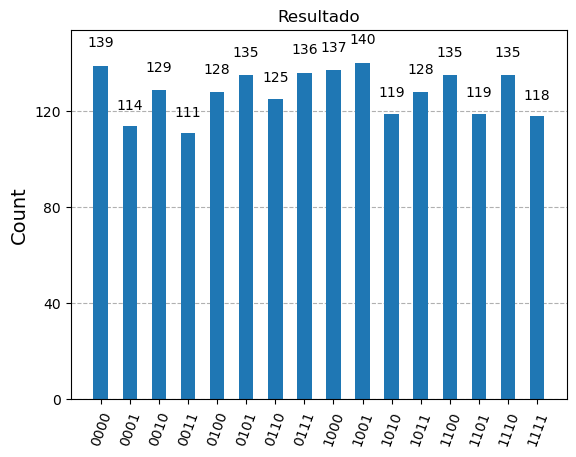

In [58]:
plot_histogram(contagem_hardware, title="Resultado") # Plot do resultado

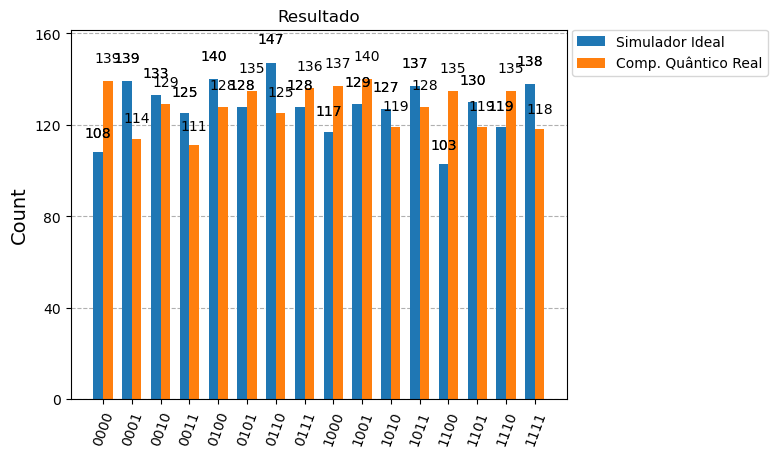

In [67]:
# Vamos juntar o resultado da simulação e da execução em hardware quant. real
plot_histogram([contagem_simulador, contagem_hardware], 
               title="Resultado", legend=["Simulador Ideal", "Comp. Quântico Real"])

# Vamos simular o circuito qc abaixo em um simulador com ruído

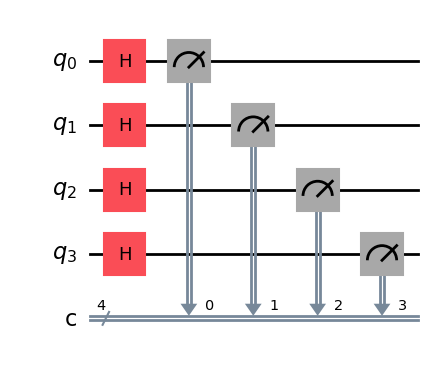

In [60]:
# Vamos definir o circuito novamente
qc = QuantumCircuit(4, 4)
qc.h(0)
qc.h(1)
qc.h(2)
qc.h(3)
qc.measure(0,0) # Vamos colocar portas de medida/observação
qc.measure(1,1)
qc.measure(2,2)
qc.measure(3,3)
qc.draw("mpl", style="iqp")

In [61]:
# Vamos fazer uma cópia do modelo de ruído e portas quânticas do backend IBM_osaka (comp. quântico real)
service = QiskitRuntimeService()
backend_osaka = service.backend("ibm_osaka")
noise_model = NoiseModel.from_backend(backend_osaka)
basis_gates = noise_model.basis_gates

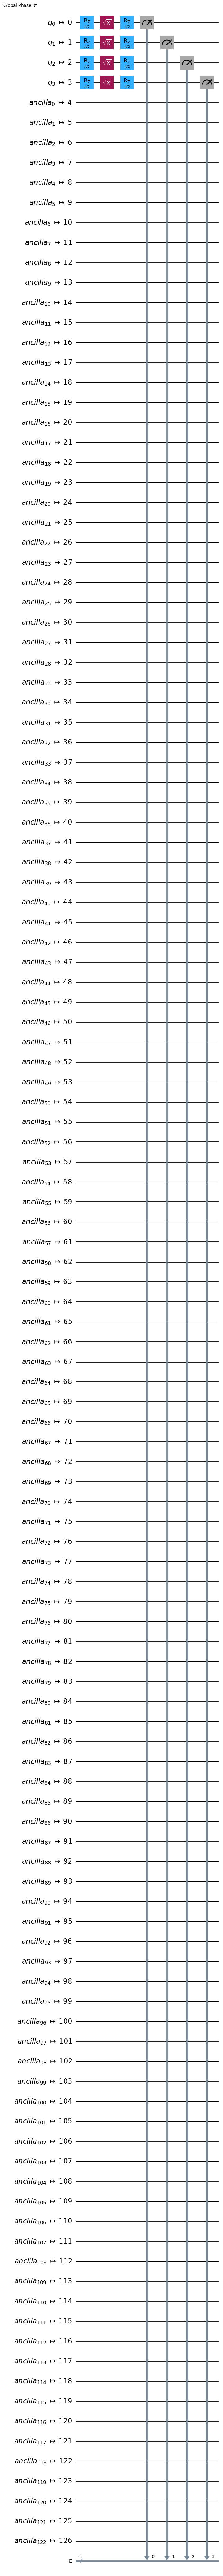

In [62]:
# Vamos criar um circuito transpilado com base nas portas disponiveis neste backend
mapped_circuit = transpile(qc, backend=backend_osaka)
mapped_circuit.draw("mpl", style="iqp")

In [63]:
simulador_aer = AerSimulator() # Carrega o simulador com ruído
# Roda o circuito transpilado 2048 vezes, usando o simulador que simula o ruído do backend IBM_osaka
resultado_noise = simulador_aer.run(mapped_circuit, shots=2048, 
                                 noise_model=noise_model, basis_gates=basis_gates). result()

In [64]:
contagem_simulador_noise = resultado_noise.get_counts() # Obtem a contagem do resultado
contagem_simulador_noise

{'1111': 148,
 '0110': 112,
 '1101': 118,
 '0100': 147,
 '1000': 127,
 '1010': 147,
 '1001': 161,
 '1110': 123,
 '0101': 124,
 '0000': 120,
 '1100': 117,
 '0111': 118,
 '0010': 119,
 '1011': 110,
 '0001': 139,
 '0011': 118}

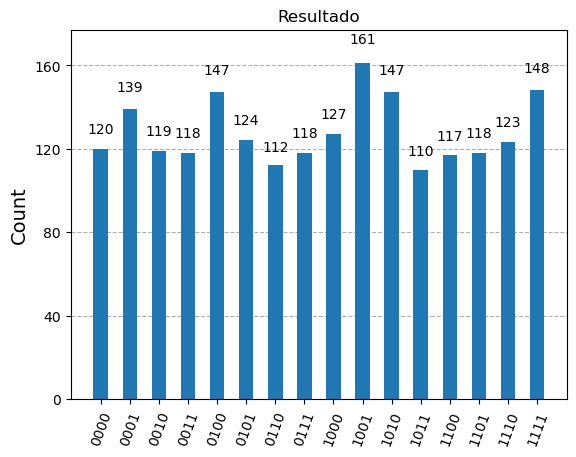

In [65]:
plot_histogram(contagem_simulador_noise, title="Resultado") # Plot do resultado

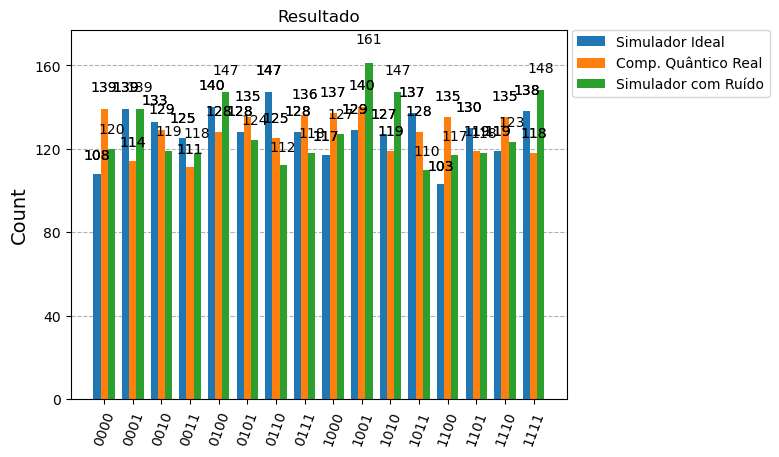

In [66]:
# Vamos juntar os 3 dados num único gráfico
plot_histogram([contagem_simulador, contagem_hardware, contagem_simulador_noise], title="Resultado", 
               legend=["Simulador Ideal", "Comp. Quântico Real", "Simulador com Ruído"])

## O resultado obtido ao executar este circuito em um hardware quântico real é o mais próximo que podemos chegar de um "gerador de números verdadeiramente aleatórios de 4 bits".

## Conclusão

Neste notebook, configuramos um ambiente para executar e simular circuitos quânticos usando o Qiskit. Exploramos tanto a execução em simuladores ideais quanto a simulação com modelos de ruído, além de rodar circuitos em hardware quântico real da IBM.

### Próximos Passos

Com o material visto aqui, você agora é capaz de executar e simular algoritmos quânticos mais complexos, que serão abordados nas próximas aulas, além de analisar os resultados obtidos.